In [139]:
#Importing Libraries
import numpy as np
import pandas as pd
import talib

In [140]:
#Setting the random seed to a fixed number
import random
random.seed(42)

In [141]:
#Importing the dataset
dataset = pd.read_csv(r'C:\Users\HP\Desktop\TATAMOTORS.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-11,560.982910,565.336182,547.477783,552.968872,552.744995,4637550.0
1,2015-02-12,556.233826,559.993530,546.636780,555.838074,555.613037,5488927.0
2,2015-02-13,556.728516,561.180786,549.110229,559.548279,559.321777,3506531.0
3,2015-02-16,562.961670,574.290161,559.498840,568.057007,567.827026,5793607.0
4,2015-02-18,566.622437,580.770630,554.700256,578.099304,577.865295,5846505.0


In [142]:
dataset = dataset.dropna()
dataset = dataset[['Open', 'High', 'Low', 'Close']]

In [143]:
#Preparing the dataset
#input features
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

In [144]:
#define output value
dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)
dataset = dataset.dropna()

In [145]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

In [146]:
#Splitting the dataset
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [147]:
#standardising
#Feature Scalingfrom sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [148]:
#Building the Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [149]:
classifier = Sequential()

In [150]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

In [151]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

In [152]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [153]:
#compliling the classifier
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [154]:
#fit the neural network to train
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
119/119 [==============================] - 1s 1ms/step - loss: 0.2499 - accuracy: 0.5041
Epoch 2/100
119/119 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.5506
Epoch 3/100
119/119 [==============================] - 0s 938us/step - loss: 0.2477 - accuracy: 0.5374
Epoch 4/100
119/119 [==============================] - 0s 997us/step - loss: 0.2453 - accuracy: 0.5538
Epoch 5/100
119/119 [==============================] - 0s 972us/step - loss: 0.2435 - accuracy: 0.5540
Epoch 6/100
119/119 [==============================] - 0s 913us/step - loss: 0.2435 - accuracy: 0.5586
Epoch 7/100
119/119 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 0.5468
Epoch 8/100
119/119 [==============================] - 0s 1ms/step - loss: 0.2412 - accuracy: 0.5694
Epoch 9/100
119/119 [==============================] - 0s 980us/step - loss: 0.2381 - accuracy: 0.5579
Epoch 10/100
119/119 [==============================] - 0s 1ms/step - loss: 0.245

Epoch 81/100
119/119 [==============================] - 0s 1ms/step - loss: 0.1587 - accuracy: 0.7818
Epoch 82/100
119/119 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.7732
Epoch 83/100
119/119 [==============================] - 0s 871us/step - loss: 0.1658 - accuracy: 0.7707
Epoch 84/100
119/119 [==============================] - 0s 989us/step - loss: 0.1666 - accuracy: 0.7637
Epoch 85/100
119/119 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.7861
Epoch 86/100
119/119 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.7707
Epoch 87/100
119/119 [==============================] - 0s 980us/step - loss: 0.1663 - accuracy: 0.7465
Epoch 88/100
119/119 [==============================] - 0s 930us/step - loss: 0.1595 - accuracy: 0.7609
Epoch 89/100
119/119 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.7943
Epoch 90/100
119/119 [==============================] - 0s 1ms/step - loss

In [155]:
#Predicting the movement of the stock
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [156]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

In [157]:
#Computing Strategy Returns
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

<ipython-input-157-b2d30d26e7f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = 0.
<ipython-input-157-b2d30d26e7f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
<ipython-input-157-b2d30d26e7f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [158]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

<ipython-input-158-c8d278af7601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = 0.
<ipython-input-158-c8d278af7601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])


In [159]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

<ipython-input-159-c41e1247ab30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
<ipython-input-159-c41e1247ab30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])


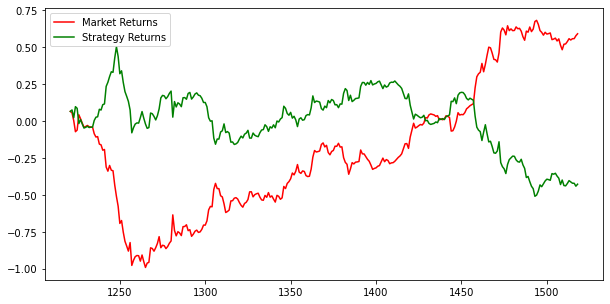

In [160]:
#Plotting the graph of returns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [161]:
stk_APPL_mean = dataset['y_pred'].mean()
stk_vol_APPL_mean = dataset['y_pred'].mean()

In [162]:
from __future__ import division
import random
import math


In [163]:
#Cost function
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

#Defining Particle class
class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1
        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=1
        c2=2
        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]

#PSO algorithm
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))
        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
        print('FINAL:')
        print('Best stock price for given group : ',pos_best_g)
        print('Possible error price for given group : ',err_best_g)

if __name__ == "__PSO__":
    main()

initial=[stk_APPL_mean,stk_vol_APPL_mean]
bounds=[(-10,10),(-10,10)]
PSO(func1,initial,bounds,num_particles=200,maxiter=400)

FINAL:
Best stock price for given group :  [-1.4180434754221803e-46, 2.020732071053954e-46]
Possible error price for given group :  6.094205401173418e-92
